In [1]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [nltk]4/5 [nltk]b]


In [2]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/satishkumar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [4]:
text = "This is an example sentence. It contains multiple sentences and words."
text = "It is an unbreakable chair and in unforeseen circumstances too, it will withstand any forces."
words = word_tokenize(text)
sentences = sent_tokenize(text)
print("Words:", words)
print("Sentences:", sentences)

Words: ['It', 'is', 'an', 'unbreakable', 'chair', 'and', 'in', 'unforeseen', 'circumstances', 'too', ',', 'it', 'will', 'withstand', 'any', 'forces', '.']
Sentences: ['It is an unbreakable chair and in unforeseen circumstances too, it will withstand any forces.']


In [5]:
!pip install transformers

  Using cached transformers-4.53.1-py3-none-any.whl.metadata (40 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached tokenizers-0.21.2-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.8 kB)
  Using cached safetensors-0.5.3-cp38-abi3-macosx_11_0_arm64.whl.metadata (3.8 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached hf_xet-1.1.5-cp37-abi3-macosx_11_0_arm64.whl.metadata (879 bytes)
Using cached transformers-4.53.1-py3-none-any.whl (10.8 MB)
Using cached hf_xet-1.1.5-cp37-abi3-macosx_11_0_arm64.whl (2.6 MB)
Using cached tokenizers-0.21.2-cp39-abi3-macosx_11_0_arm64.whl (2.7 MB)
Using cached fsspec-2025.5.1-py3-none-any.whl (199 kB)
Using cached safetensors-0.5.3-cp38-abi3-macosx_11_0_arm64.whl (418 kB)
Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [transformers] [transformers]ub]


In [6]:
!pip install torch

  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 16.0 MB/s eta 0:00:0000:0100:01
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [torch]32m3/4 [torch]kx]


In [ ]:
!pip install plotly
!pip install scikit-learn
!pip install matplotlib

In [18]:
# 3D Token Visualization - AI Mastery Series Demo
# This code demonstrates tokenization and 3D visualization of word embeddings

# Install required packages (run this cell first)
# !pip install transformers torch plotly pandas scikit-learn

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re
from collections import Counter

# Configure plotly for Jupyter notebooks
import plotly.io as pio
pio.renderers.default = "notebook"

# For better compatibility across different environments
try:
    import plotly.offline as pyo
    pyo.init_notebook_mode(connected=True)
    print("Plotly notebook mode initialized successfully")
except:
    print("Using default plotly renderer")

print("All libraries imported successfully!")

Plotly notebook mode initialized successfully
All libraries imported successfully!


In [20]:
# Set up the tokenizer and model
print("Loading tokenizer and model...")
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

# Sample words for demonstration
sample_words = [
    # Your core example
    "unbreakable", "understand", "unable", "unforeseen", "unexpected",
    "breaking", "breakthrough", "outbreak", "breakdown", "breakage",
    "understandable", "capable", "reliable", "readable", "comfortable",
    
    # Additional related words
    "break", "able", "un", "happy", "unhappy", "happiness",
    "running", "runner", "run", "walked", "walking", "walk",
    "development", "developer", "develop", "developing",
    "artificial", "intelligence", "machine", "learning", "deep",
    
    # Technical terms
    "tokenization", "embedding", "transformer", "attention", "neural",
    "algorithm", "optimization", "gradient", "descent", "backpropagation"
]

print(f"Sample words: {len(sample_words)} words")

# Function to tokenize and get detailed breakdown
def analyze_tokenization(words, tokenizer):
    """Analyze how words are tokenized"""
    results = []
    
    for word in words:
        # Tokenize the word
        tokens = tokenizer.tokenize(word)
        token_ids = tokenizer.convert_tokens_to_ids(tokens)
        
        results.append({
            'word': word,
            'tokens': tokens,
            'token_count': len(tokens),
            'token_ids': token_ids,
            'reconstructed': tokenizer.convert_tokens_to_string(tokens)
        })
    
    return results

# Analyze tokenization
print("\n=== TOKENIZATION ANALYSIS ===")
tokenization_results = analyze_tokenization(sample_words, tokenizer)

# Display tokenization breakdown
print("\nWord → Tokens breakdown:")
for result in tokenization_results[:10]:  # Show first 10
    print(f"'{result['word']}' → {result['tokens']} ({result['token_count']} tokens)")

# Create a comprehensive token analysis
all_tokens = []
token_word_mapping = []

for result in tokenization_results:
    for token in result['tokens']:
        all_tokens.append(token)
        token_word_mapping.append({
            'token': token,
            'original_word': result['word'],
            'word_length': len(result['word']),
            'token_count_in_word': result['token_count']
        })

# Count token frequency
token_counts = Counter(all_tokens)
print(f"\nTotal unique tokens: {len(token_counts)}")
print("Most common tokens:")
for token, count in token_counts.most_common(10):
    print(f"  '{token}': {count} times")

# Function to get embeddings for tokens
def get_token_embeddings(tokens, tokenizer, model):
    """Get embeddings for tokens"""
    embeddings = []
    valid_tokens = []
    
    for token in tokens:
        # Convert token to input format
        token_id = tokenizer.convert_tokens_to_ids([token])[0]
        
        # Skip special tokens
        if token_id != tokenizer.unk_token_id:
            # Get embedding
            with torch.no_grad():
                inputs = tokenizer(token, return_tensors='pt', add_special_tokens=False)
                outputs = model(**inputs)
                # Use mean of last hidden state
                embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
                embeddings.append(embedding)
                valid_tokens.append(token)
    
    return np.array(embeddings), valid_tokens

Loading tokenizer and model...
Sample words: 46 words

=== TOKENIZATION ANALYSIS ===

Word → Tokens breakdown:
'unbreakable' → ['un', '##break', '##able'] (3 tokens)
'understand' → ['understand'] (1 tokens)
'unable' → ['unable'] (1 tokens)
'unforeseen' → ['un', '##for', '##ese', '##en'] (4 tokens)
'unexpected' → ['unexpected'] (1 tokens)
'breaking' → ['breaking'] (1 tokens)
'breakthrough' → ['breakthrough'] (1 tokens)
'outbreak' → ['outbreak'] (1 tokens)
'breakdown' → ['breakdown'] (1 tokens)
'breakage' → ['break', '##age'] (2 tokens)

Total unique tokens: 55
Most common tokens:
  'un': 3 times
  '##able': 3 times
  'understand': 2 times
  'break': 2 times
  '##break': 1 times
  'unable': 1 times
  '##for': 1 times
  '##ese': 1 times
  '##en': 1 times
  'unexpected': 1 times



Generating embeddings for 55 unique tokens...
Generated embeddings shape: (55, 768)

Reducing dimensions to 3D using PCA...
3D embeddings shape: (55, 3)
Explained variance ratio: [0.1555297  0.08832376 0.07834704]
Total explained variance: 0.322

Creating 3D visualization...


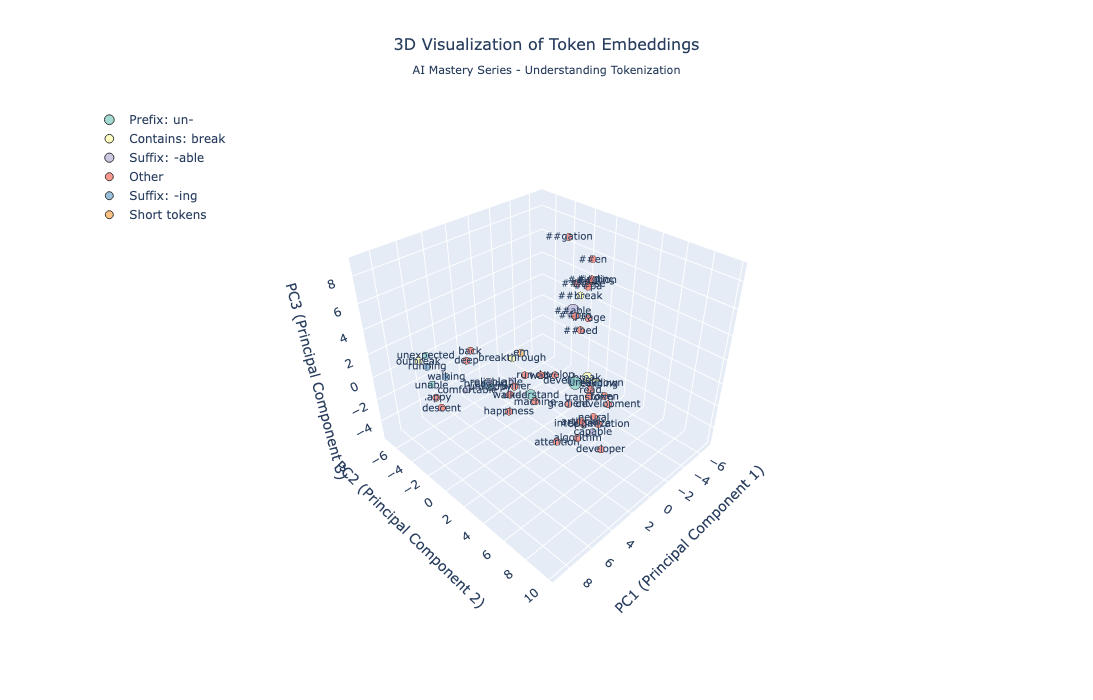

✅ 3D visualization displayed successfully!

=== INSIGHTS FOR TOKENIZATION BENEFITS ===

1. TOKENIZATION BENEFITS:
   - Vocabulary reduction: Instead of thousands of words, we use fewer tokens
   - Subword reusability: 'un', 'break', 'able' appear in multiple words
   - Handles unknown words: New words can be broken into known subwords

2. 3D VISUALIZATION INSIGHTS:
   - Similar tokens cluster together in the embedding space
   - Prefixes like 'un-' and suffixes like '-able' form their own regions
   - Frequency affects the importance (size) of tokens

3. PRACTICAL IMPLICATIONS:
   - Models learn relationships between token parts
   - Understanding 'break' helps with 'breaking', 'breakdown', etc.
   - Efficient representation enables better AI language understanding

Creating simplified 2D version...


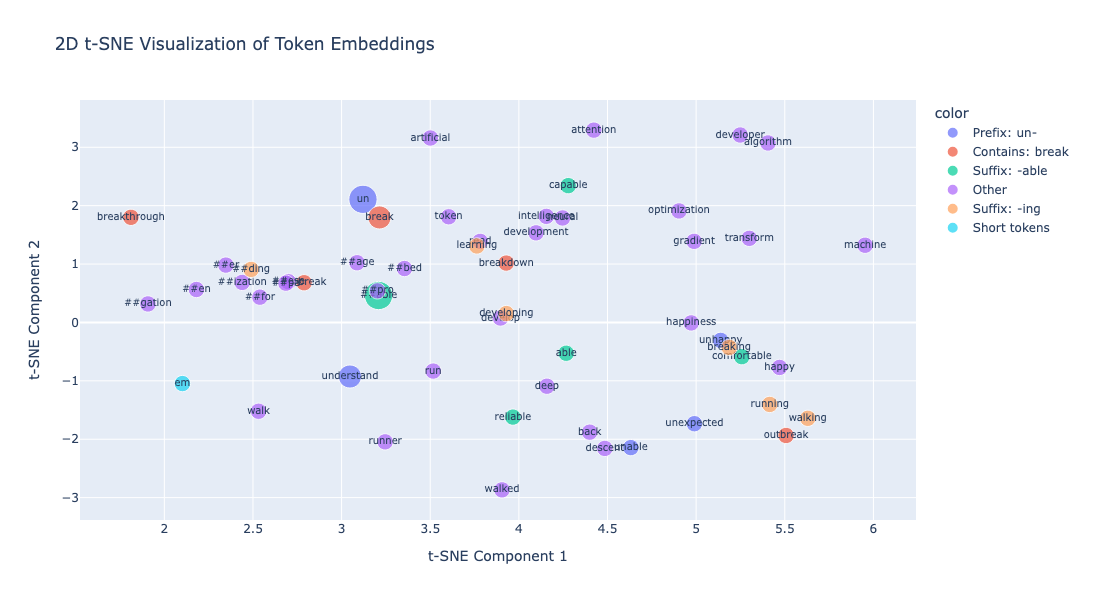

✅ 2D visualization displayed successfully!

=== DEMO COMPLETE ===
These visualizations show how:
1. Words are broken into meaningful subword tokens
2. Similar tokens cluster together in vector space
3. This enables efficient and powerful language understanding in AI

=== TOKEN DATA TABLE ===
        token         x         y         z  frequency         category
0          un -1.658749  1.641543 -1.511062          3      Prefix: un-
1     ##break -5.150023 -1.236311  3.308090          1  Contains: break
2      ##able -5.076567 -1.898613  1.766661          3    Suffix: -able
3  understand  2.876693  1.686449 -0.016836          2      Prefix: un-
4      unable  7.962558 -2.419820  1.348107          1      Prefix: un-
5       ##for -5.471778 -1.929734  3.976927          1            Other
6       ##ese -6.130571 -1.282206  3.948437          1            Other
7        ##en -5.853510 -0.793200  6.209376          1            Other
8  unexpected  6.739393 -4.641232  1.978782          1     

In [23]:
# Get embeddings for unique tokens
unique_tokens = list(token_counts.keys())
print(f"\nGenerating embeddings for {len(unique_tokens)} unique tokens...")

embeddings, valid_tokens = get_token_embeddings(unique_tokens, tokenizer, model)
print(f"Generated embeddings shape: {embeddings.shape}")

# Reduce dimensions to 3D using PCA
print("\nReducing dimensions to 3D using PCA...")
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)

print(f"3D embeddings shape: {embeddings_3d.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.3f}")

# Create dataframe for visualization
df_viz = pd.DataFrame({
    'token': valid_tokens,
    'x': embeddings_3d[:, 0],
    'y': embeddings_3d[:, 1],
    'z': embeddings_3d[:, 2],
    'frequency': [token_counts[token] for token in valid_tokens]
})

# Add categories for coloring
def categorize_token(token):
    if token.startswith('un'):
        return 'Prefix: un-'
    elif token.endswith('able'):
        return 'Suffix: -able'
    elif token.endswith('ing'):
        return 'Suffix: -ing'
    elif 'break' in token:
        return 'Contains: break'
    elif token in ['the', 'a', 'an', 'and', 'or', 'but']:
        return 'Common words'
    elif len(token) <= 2:
        return 'Short tokens'
    else:
        return 'Other'

df_viz['category'] = df_viz['token'].apply(categorize_token)

# Create 3D interactive plot with error handling
print("\nCreating 3D visualization...")

try:
    fig = go.Figure()

    # Add points for each category
    categories = df_viz['category'].unique()
    colors = px.colors.qualitative.Set3

    for i, category in enumerate(categories):
        mask = df_viz['category'] == category
        subset = df_viz[mask]
        
        fig.add_trace(go.Scatter3d(
            x=subset['x'],
            y=subset['y'],
            z=subset['z'],
            mode='markers+text',
            marker=dict(
                size=subset['frequency'] * 3 + 5,  # Size based on frequency
                color=colors[i % len(colors)],
                opacity=0.8,
                line=dict(width=1, color='black')
            ),
            text=subset['token'],
            textposition='middle center',
            textfont=dict(size=10),
            name=category,
            hovertemplate=
            '<b>Token:</b> %{text}<br>' +
            '<b>Category:</b> ' + category + '<br>' +
            '<b>Frequency:</b> %{marker.size}<br>' +
            '<b>Coordinates:</b> (%{x:.2f}, %{y:.2f}, %{z:.2f})<br>' +
            '<extra></extra>'
        ))

    # Update layout
    fig.update_layout(
        title={
            'text': '3D Visualization of Token Embeddings<br><sub>AI Mastery Series - Understanding Tokenization</sub>',
            'x': 0.5,
            'font': {'size': 16}
        },
        scene=dict(
            xaxis_title='PC1 (Principal Component 1)',
            yaxis_title='PC2 (Principal Component 2)',
            zaxis_title='PC3 (Principal Component 3)',
            camera=dict(
                eye=dict(x=1.5, y=1.5, z=1.5)
            )
        ),
        width=900,
        height=700,
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        )
    )

    # Display the plot with multiple fallback options
    try:
        fig.show()
        print("✅ 3D visualization displayed successfully!")
    except Exception as e:
        print(f"⚠️  Direct show() failed: {e}")
        try:
            # Try using plotly offline
            import plotly.offline as pyo
            pyo.iplot(fig)
            print("✅ 3D visualization displayed using offline mode!")
        except Exception as e2:
            print(f"⚠️  Offline mode failed: {e2}")
            # Save as HTML file as fallback
            fig.write_html("3d_token_visualization.html")
            print("💾 3D visualization saved as '3d_token_visualization.html'")
            print("   You can open this file in your browser to view the interactive 3D plot!")

except Exception as e:
    print(f"❌ Error creating 3D visualization: {e}")
    print("Trying alternative matplotlib visualization...")
    
    # Fallback to matplotlib 3D plot
    try:
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D
        
        fig_mpl = plt.figure(figsize=(12, 8))
        ax = fig_mpl.add_subplot(111, projection='3d')
        
        # Plot each category with different colors
        categories = df_viz['category'].unique()
        colors_mpl = plt.cm.Set3(np.linspace(0, 1, len(categories)))
        
        for i, category in enumerate(categories):
            mask = df_viz['category'] == category
            subset = df_viz[mask]
            
            ax.scatter(subset['x'], subset['y'], subset['z'], 
                      s=subset['frequency'] * 20 + 50,
                      c=[colors_mpl[i]], 
                      alpha=0.7,
                      label=category)
            
            # Add text labels
            for j, row in subset.iterrows():
                ax.text(row['x'], row['y'], row['z'], row['token'], 
                       fontsize=8, alpha=0.8)
        
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        ax.set_title('3D Token Embeddings (Matplotlib Fallback)')
        ax.legend()
        
        plt.tight_layout()
        plt.show()
        print("✅ Alternative matplotlib 3D visualization displayed!")
        
    except Exception as e3:
        print(f"❌ Matplotlib fallback also failed: {e3}")
        print("📊 Data is ready but visualization failed. Check your environment setup.")

# Print insights
print("\n=== INSIGHTS FOR TOKENIZATION BENEFITS ===")
print("\n1. TOKENIZATION BENEFITS:")
print("   - Vocabulary reduction: Instead of thousands of words, we use fewer tokens")
print("   - Subword reusability: 'un', 'break', 'able' appear in multiple words")
print("   - Handles unknown words: New words can be broken into known subwords")

print("\n2. 3D VISUALIZATION INSIGHTS:")
print("   - Similar tokens cluster together in the embedding space")
print("   - Prefixes like 'un-' and suffixes like '-able' form their own regions")
print("   - Frequency affects the importance (size) of tokens")

print("\n3. PRACTICAL IMPLICATIONS:")
print("   - Models learn relationships between token parts")
print("   - Understanding 'break' helps with 'breaking', 'breakdown', etc.")
print("   - Efficient representation enables better AI language understanding")

# Create a simplified 2D version for easier viewing
print("\nCreating simplified 2D version...")

try:
    # Use t-SNE for 2D
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(valid_tokens)-1))
    embeddings_2d = tsne.fit_transform(embeddings)

    fig_2d = px.scatter(
        x=embeddings_2d[:, 0],
        y=embeddings_2d[:, 1],
        color=df_viz['category'],
        size=df_viz['frequency'],
        text=df_viz['token'],
        title='2D t-SNE Visualization of Token Embeddings',
        labels={'x': 't-SNE Component 1', 'y': 't-SNE Component 2'},
        width=800,
        height=600
    )

    fig_2d.update_traces(textposition='middle center', textfont_size=10)
    
    try:
        fig_2d.show()
        print("✅ 2D visualization displayed successfully!")
    except Exception as e:
        print(f"⚠️  2D visualization show() failed: {e}")
        fig_2d.write_html("2d_token_visualization.html")
        print("💾 2D visualization saved as '2d_token_visualization.html'")

except Exception as e:
    print(f"❌ Error creating 2D visualization: {e}")
    print("Trying matplotlib 2D fallback...")
    
    try:
        import matplotlib.pyplot as plt
        
        # Simple 2D scatter plot
        plt.figure(figsize=(12, 8))
        
        # Plot each category with different colors
        categories = df_viz['category'].unique()
        colors_mpl = plt.cm.Set3(np.linspace(0, 1, len(categories)))
        
        for i, category in enumerate(categories):
            mask = df_viz['category'] == category
            subset = df_viz[mask]
            
            plt.scatter(subset['x'], subset['y'], 
                       s=subset['frequency'] * 20 + 50,
                       c=[colors_mpl[i]], 
                       alpha=0.7,
                       label=category)
            
            # Add text labels
            for j, row in subset.iterrows():
                plt.text(row['x'], row['y'], row['token'], 
                        fontsize=8, alpha=0.8)
        
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title('2D Token Embeddings (Matplotlib Fallback)')
        plt.legend()
        plt.tight_layout()
        plt.show()
        print("✅ Alternative matplotlib 2D visualization displayed!")
        
    except Exception as e2:
        print(f"❌ All visualization methods failed: {e2}")
        print("📊 Data is available in df_viz DataFrame for manual inspection")

print("\n=== DEMO COMPLETE ===")
print("These visualizations show how:")
print("1. Words are broken into meaningful subword tokens")
print("2. Similar tokens cluster together in vector space")
print("3. This enables efficient and powerful language understanding in AI")

# Display the data table as backup
print("\n=== TOKEN DATA TABLE ===")
print(df_viz.head(10))
print(f"\nTotal tokens: {len(df_viz)}")
print(f"Categories: {df_viz['category'].unique()}")